# Project name - FBI Time Series Forecasting ML

Project type - ML

Contribution - Individual

Name - Adya Singh

# Project Summary

In today's world crime rates are rising across everywhere. It's very important to be able to protect the people and prevent people from going down the wrong path.
 Crime prediction would prove to be an excellent solution to problem that will decrease crime rates and help law enforcement agencies to efficiently do their duty.
 The FBI Time series prediction model is a ML Model that will be able to predict crimes based on previous patterns.

 Documentation -
  1. Problem Statement - Due to increasing crime artes we are going to develop a model that will be able to predict crimes, help in unlawful situations and make
  jobs of police a little bit easier.

  2. Scope - In future can be expanded to predict attacks by terrorists and even helpful when assisting foreign dignitaries.

  3. Process - The key steps followed here are -
    1.Data Collection, Cleaning and Preprocessing

    2.EDA

    3.Model chosen

    4.Model training

    5.Results

    6.Implementation and Deployment

  4. Results - We successfully deployed the model

# Github link

Provide your github link here

# Problem Statement

In today's world crime rates are rising across everywhere. It's very important to be able to protect the people and prevent people from going down the wrong path.
 Crime prediction would prove to be an excellent solution to problem that will decrease crime rates and help law enforcement agencies to efficiently do their duty.
 The FBI Time series prediction model is a ML Model that will be able to predict crimes based on previous patterns.

# General Guidelines

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Lets Begin***

## 1. Know your data

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Dataset loading

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Dataset first view

In [ ]:
train.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,5/12/1999
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,5/7/1999
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,4/23/1999
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,4/20/1999
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,4/12/1999


# Dataset rows and columns count

In [ ]:
print(" Train dataset Shape:", train.shape)
print(" Test Dataset Shape: ", test.shape)

 Train dataset Shape: (474565, 13)
 Test Dataset Shape:  (162, 4)


# Dataset information

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474565 non-null  object 
 1   HUNDRED_BLOCK  474552 non-null  object 
 2   NEIGHBOURHOOD  423074 non-null  object 
 3   X              474565 non-null  float64
 4   Y              474565 non-null  float64
 5   Latitude       474565 non-null  float64
 6   Longitude      474565 non-null  float64
 7   HOUR           425200 non-null  float64
 8   MINUTE         425200 non-null  float64
 9   YEAR           474565 non-null  int64  
 10  MONTH          474565 non-null  int64  
 11  DAY            474565 non-null  int64  
 12  Date           474565 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 47.1+ MB
None


# Duplicate values

In [ ]:
duplicate_count = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
duplicate_count = test.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 44618
Number of duplicate rows: 0


# Mising values

In [ ]:
print(train.isnull().sum())

TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64


<Axes: >

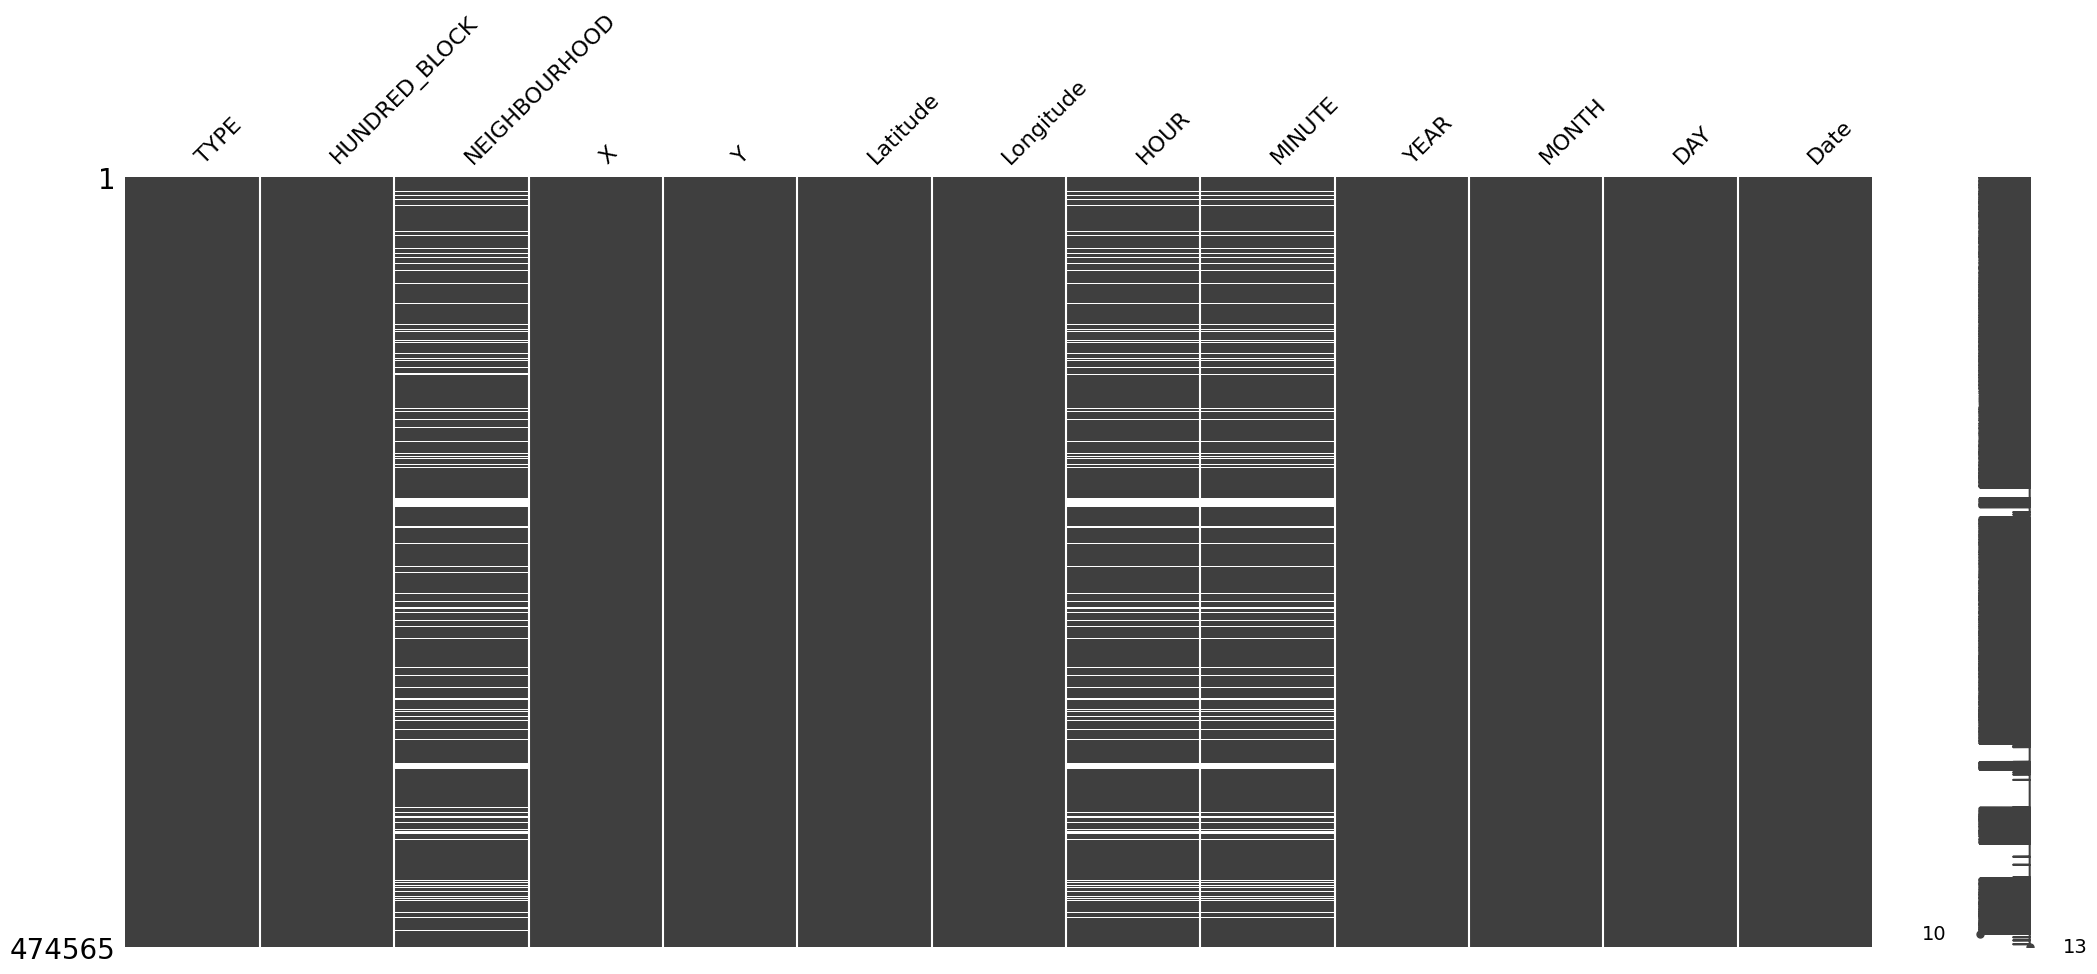

In [ ]:
msno.matrix(train)

<Axes: >

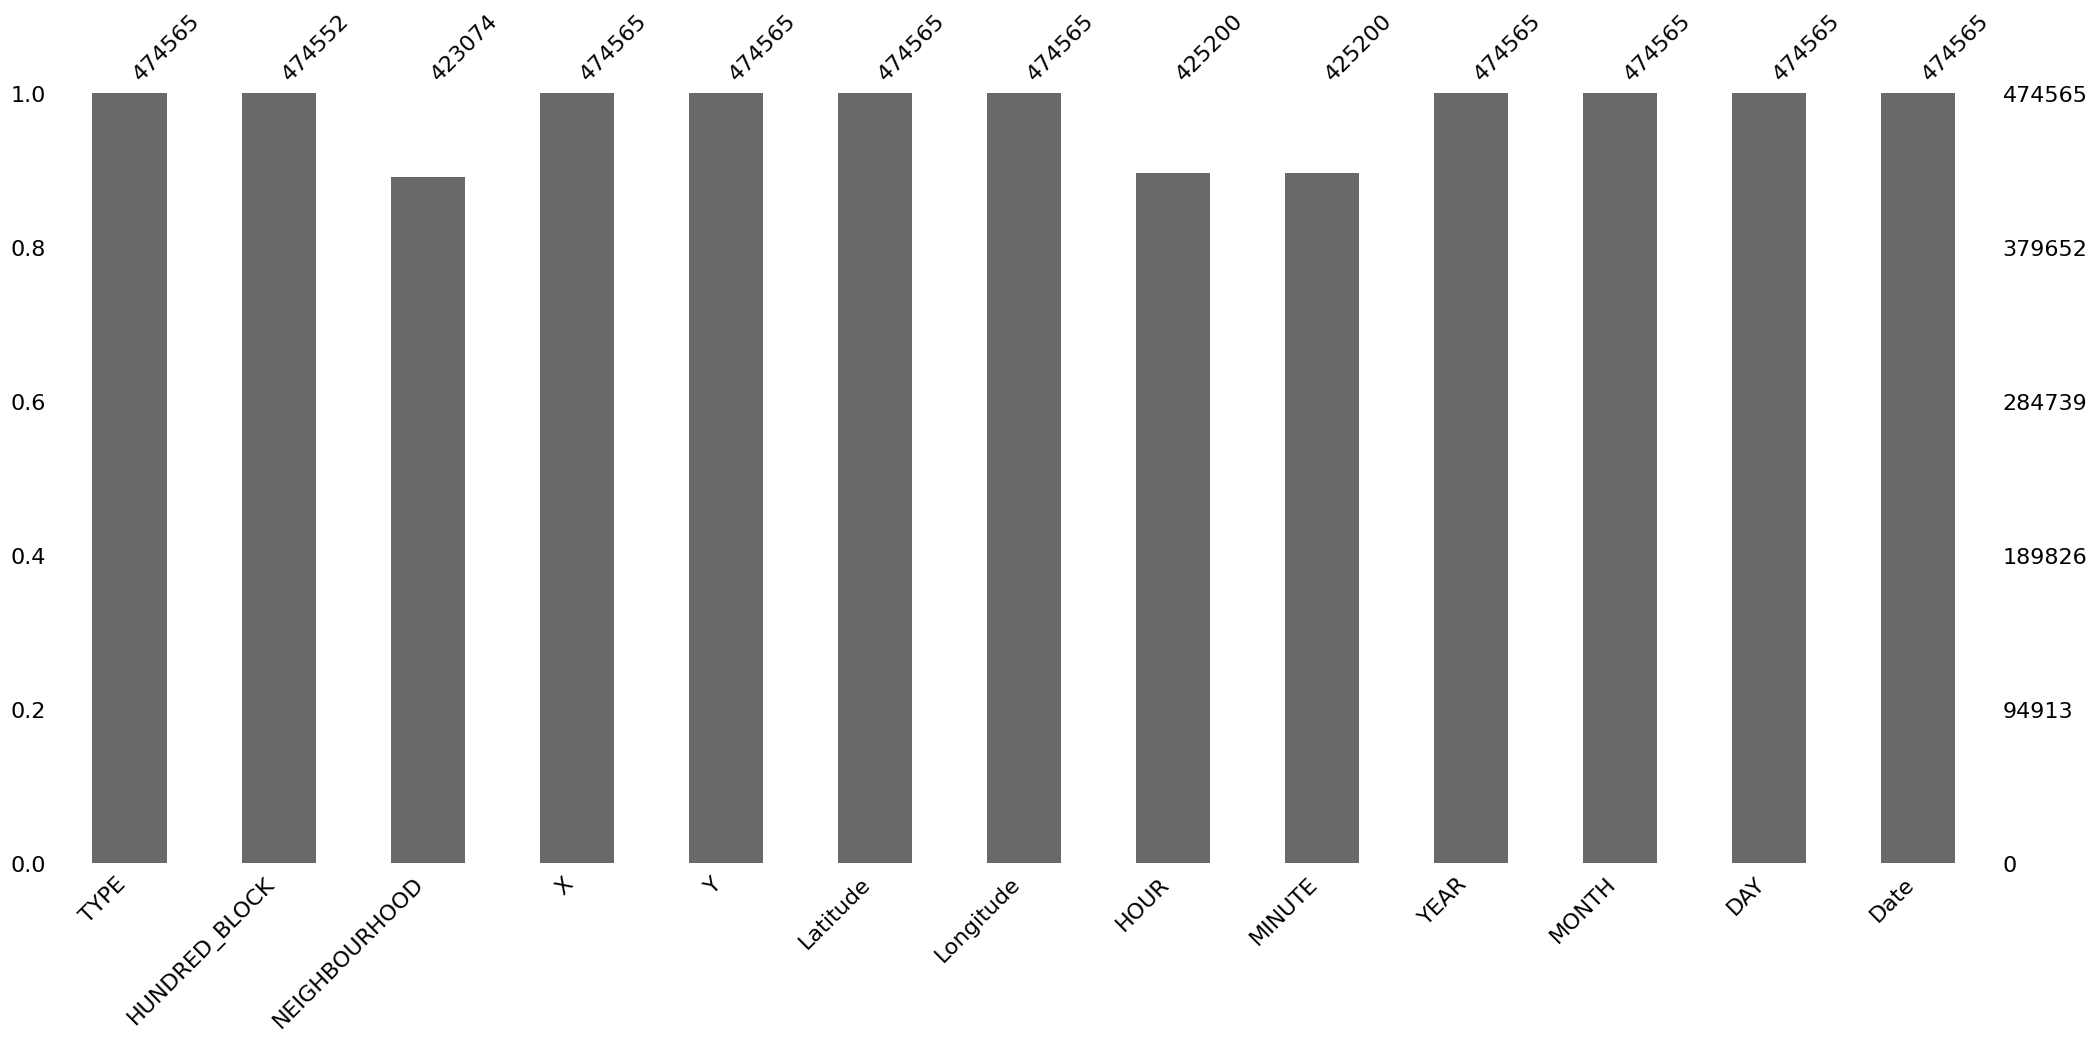

In [ ]:
msno.bar(train)


<Axes: ylabel='Frequency'>

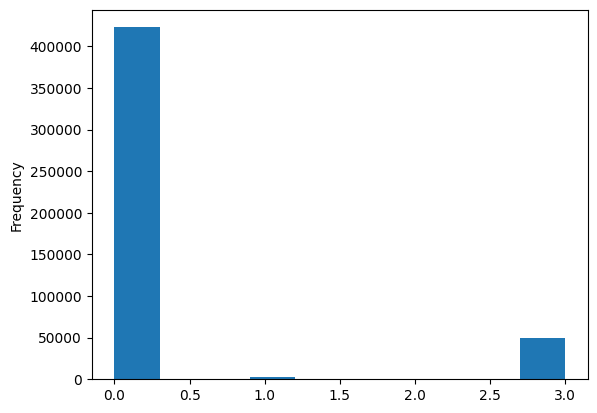

In [ ]:
train.isnull().sum(axis=1).plot(kind='hist')

# What did you know about your dataset?

The given dataset has 474565 rows and 13 columns. It has several missing values that have been visualized above.

## ***2. Understanding Your Variables***

Dataset column

In [ ]:
print(train.columns)

Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')


Dataset describe

In [ ]:
train.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000


# Variables description

TYPE - Category of the crime (e.g."Other Theft").

HUNDRED_BLOCK - Street block where the crime occurred.

NEIGHBOURHOOD - Neighborhood where the crime took place.

X - X-coordinate of the crime location.

Y - Y-coordinate of the crime location.

Latitude - Latitude of the crime location

Longitude - Longitude of the crime location

HOUR - Hour of the day when the crime occurred

MINUTE - Minute of the hour when the crime occurred

Date - date when the crime happened

### Check Unique Values for each variable.

In [ ]:
print(train.nunique())

TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64


## 3. ***Data Wrangling***

In [ ]:
train = train.drop_duplicates()


In [ ]:
train['TYPE'] = train['TYPE'].astype('category').cat.codes
train['NEIGHBOURHOOD'] = train['NEIGHBOURHOOD'].astype('category').cat.codes

<ipython-input-22-83dd186ecfbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TYPE'] = train['TYPE'].astype('category').cat.codes
<ipython-input-22-83dd186ecfbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NEIGHBOURHOOD'] = train['NEIGHBOURHOOD'].astype('category').cat.codes


In [ ]:
train.to_csv("train_clean.csv", index=False)

In [ ]:
from google.colab import files
files.download('train_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train.shape

(429947, 13)

### What all manipulations have you done and insights you found?

We cleaned the dataset. We removed duplicate values from the datset. As we can see we also coded neighbourhood into numerical values. Hence the datset was cleaned. We can also perform feature engineering here. The dataset was hence cleaned and thus downloaded into the system.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Univariate Analysis

#### Chart - 1 : Type of crime distribution

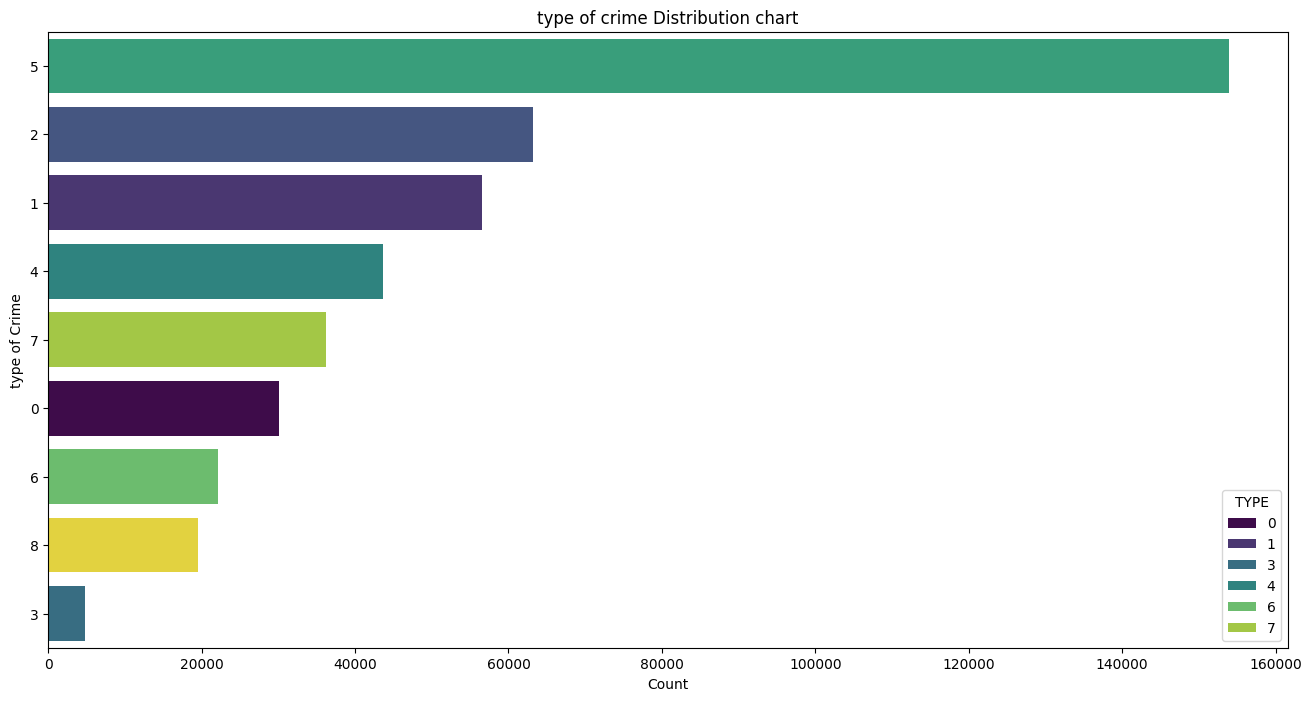

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(y=train["TYPE"], hue = train["TYPE"],order=train["TYPE"].value_counts().index, palette="viridis")
plt.title("type of crime Distribution chart")
plt.xlabel("Count")
plt.ylabel("type of Crime")
plt.show()

##### 1. Why did you pick the specific chart?

This a bar graph which tells us about the types of crime distribution

##### 2. What is/are the insight(s) found from the chart?

We found about the particular type of crimes that took place

#### Chart - 2 : Frequency of Crime by day

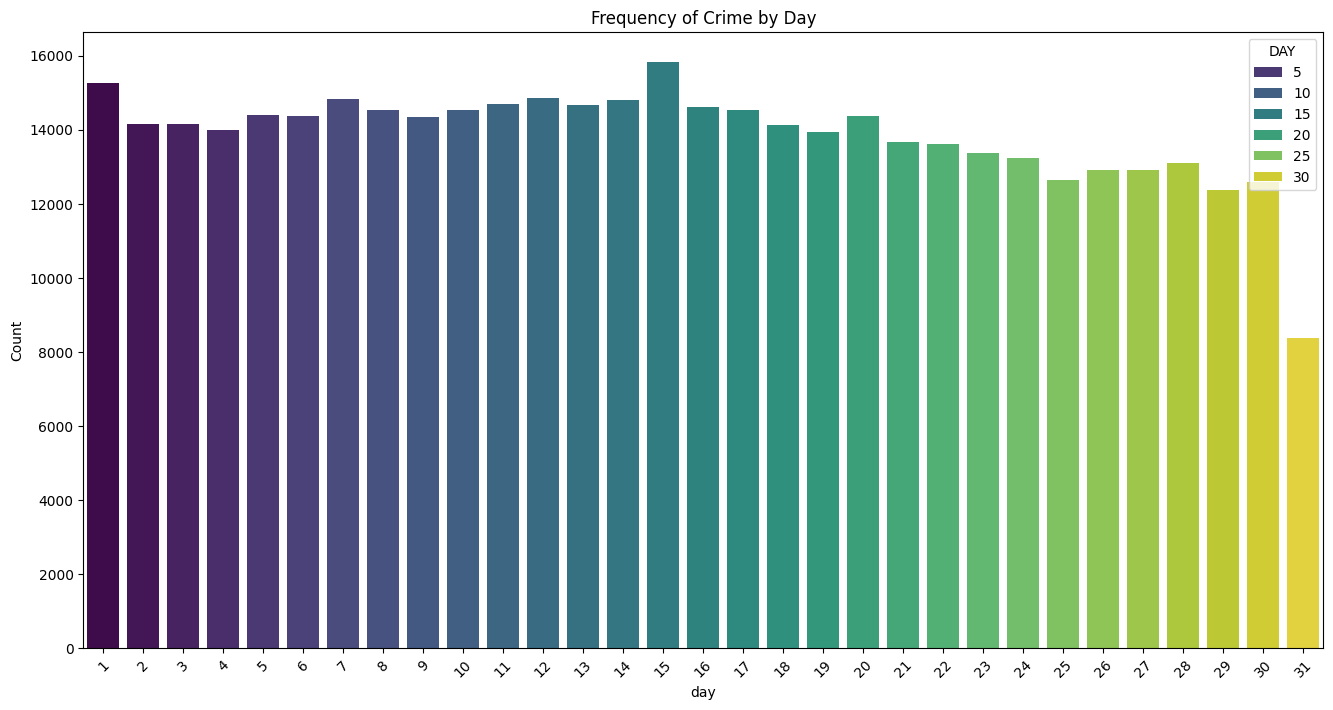

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x=train["DAY"], hue=train["DAY"], palette="viridis")
plt.title("Frequency of Crime by Day")
plt.xlabel("day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This graph indicates when most crimes take place and on which day of the month

##### 2. What is/are the insight(s) found from the chart?

We found that the no of crimes that take place in a day

#### Chart - 3 : Frequency of crime by month

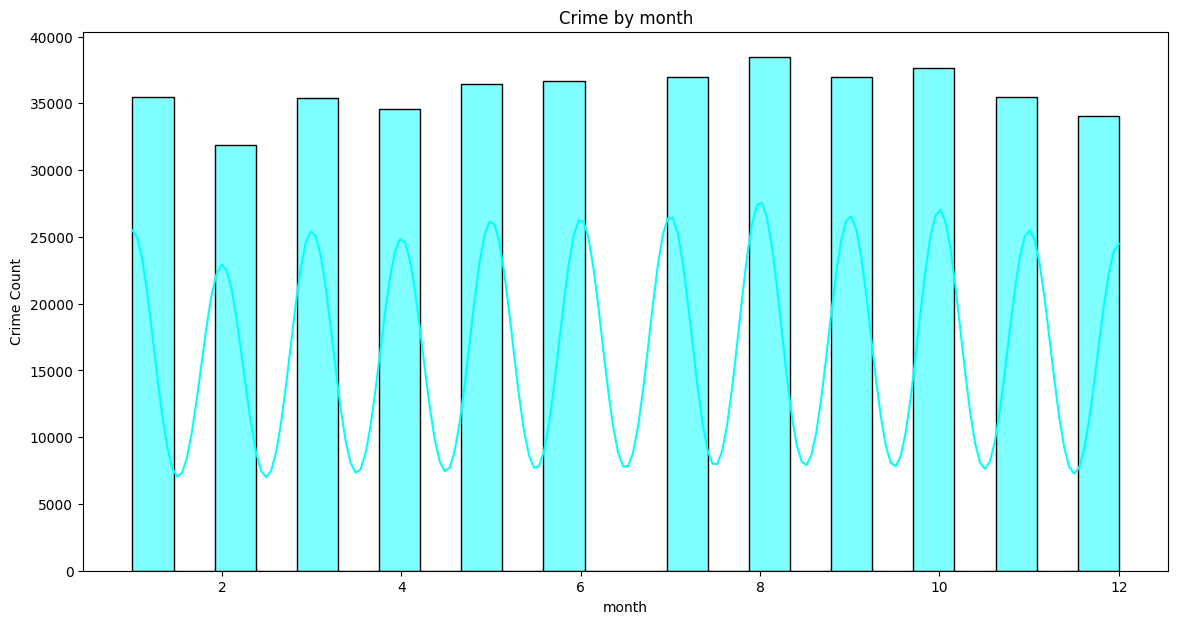

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(train["MONTH"], bins=24, kde=True, color="cyan")
plt.title("Crime by month")
plt.xlabel("month")
plt.ylabel("Crime Count")
plt.show()

##### 1. Why did you pick the specific chart?

This histogram tells about the crime frequency during the year. it indicates the month when most crimes take place.

##### 2. What is/are the insight(s) found from the chart?

We found about the crime count over monthly distribution

#### Chart - 4 : Crime frequency by month

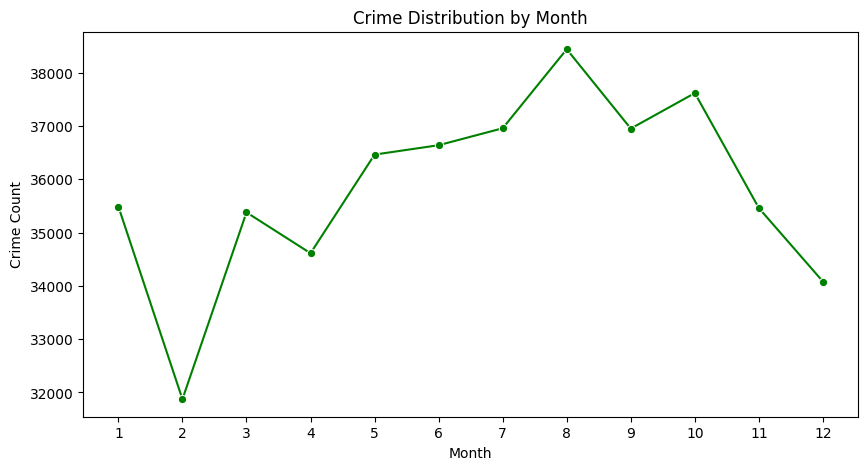

In [ ]:
crime_by_month = train["MONTH"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=crime_by_month.index, y=crime_by_month.values, marker="o", color="green")
plt.title("Crime Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.xticks(range(1, 13))
plt.show()

##### 1. Why did you pick the specific chart?

This is a line chart. It indicates crime frequency in months. We can see month 8 has highest crime count.

##### 2. What is/are the insight(s) found from the chart?

This told us about the crime frequency over the months of the dataset

#### Chart - 5 : Frequency of crime occured by years

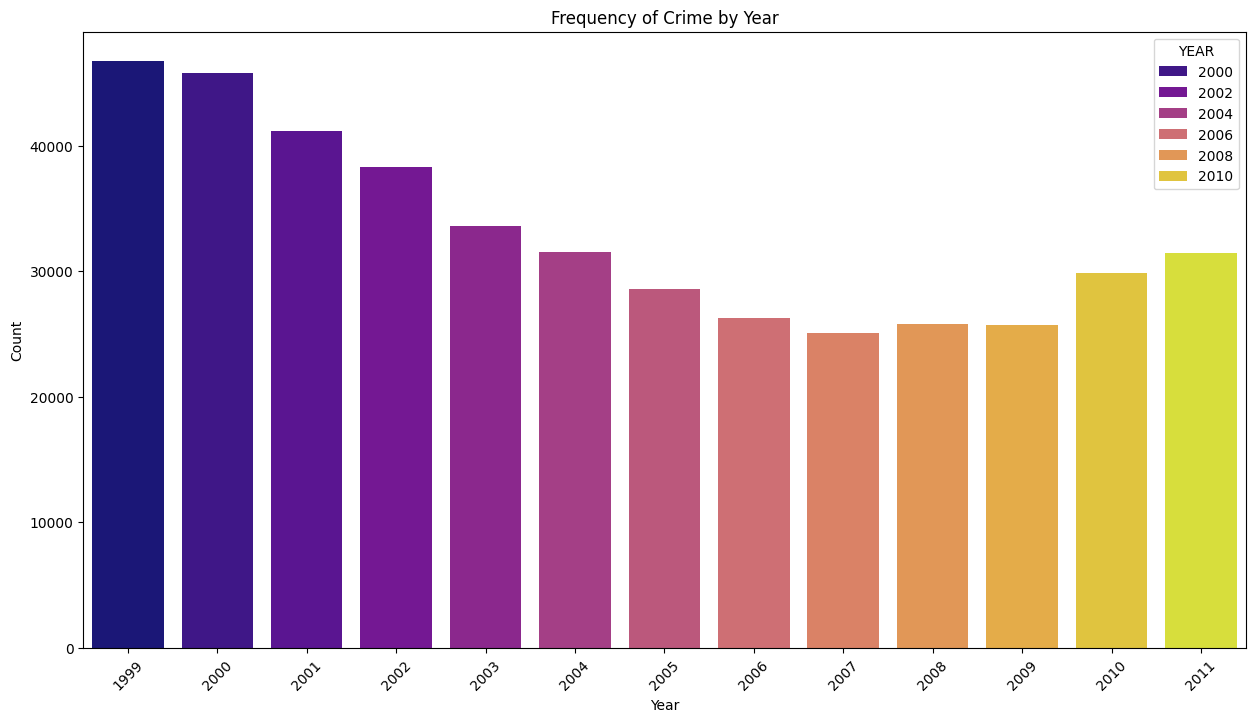

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=train["YEAR"], hue=train["YEAR"], palette="plasma")
plt.title("Frequency of Crime by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This graph represents the crime happenings over the years.

##### 2. What is/are the insight(s) found from the chart?

This gave us the insight about crime frequency over the years

#### Chart - 6 : Crime frequency by neighbourhoods

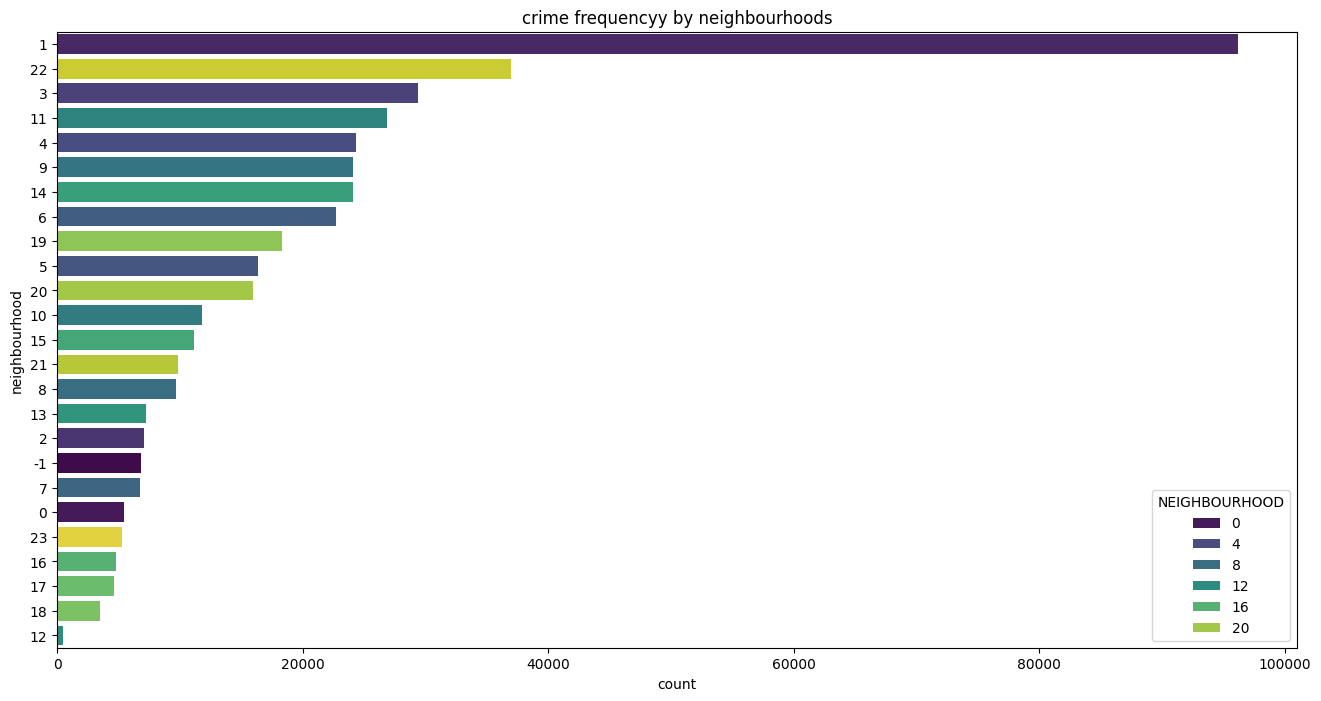

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(y=train["NEIGHBOURHOOD"], hue = train["NEIGHBOURHOOD"],order=train["NEIGHBOURHOOD"].value_counts().index, palette="viridis")
plt.title("crime frequencyy by neighbourhoods")
plt.xlabel("count")
plt.ylabel("neighbourhood")
plt.show()

##### 1. Why did you pick the specific chart?

This graph ranks the neighbourhoods with highest crime ranking

##### 2. What is/are the insight(s) found from the chart?

This graph told us about the crime happenings in various neighbourhoods

Bivariate analysis

#### Chart - 7 : Crime type vs hour of day

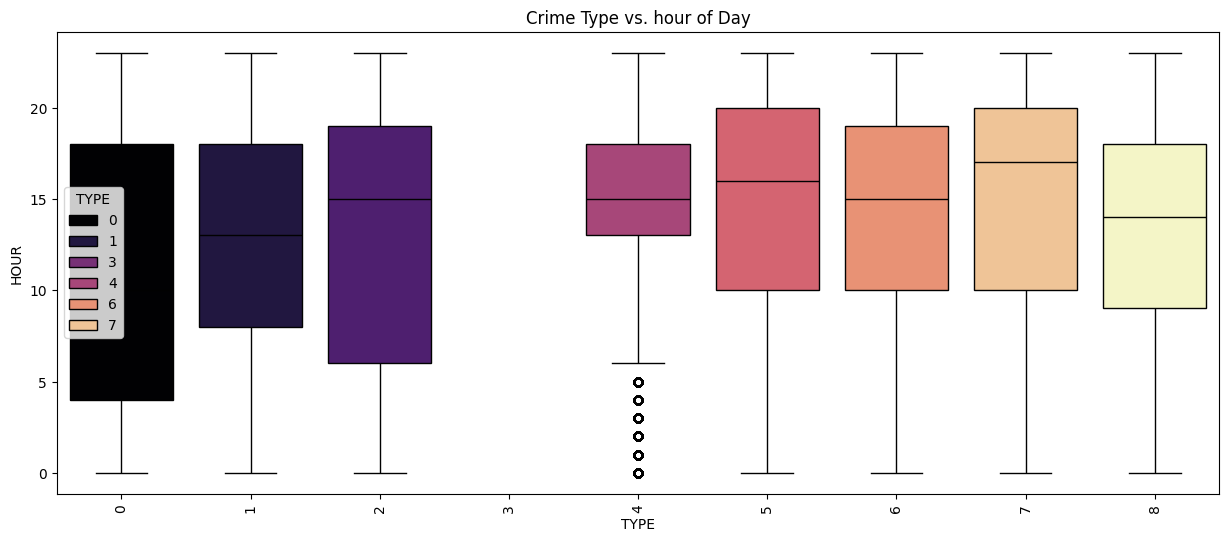

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="TYPE", y="HOUR", hue='TYPE',data=train, palette="magma")
plt.xticks(rotation=90)
plt.title("Crime Type vs. hour of Day")
plt.show()

##### 1. Why did you pick the specific chart?

This bivariate graph compares at which hour crime rate is highest.

##### 2. What is/are the insight(s) found from the chart?

This told us about the type of crimes that occured at a particular hour

#### Chart - 8 : Crime type vs month

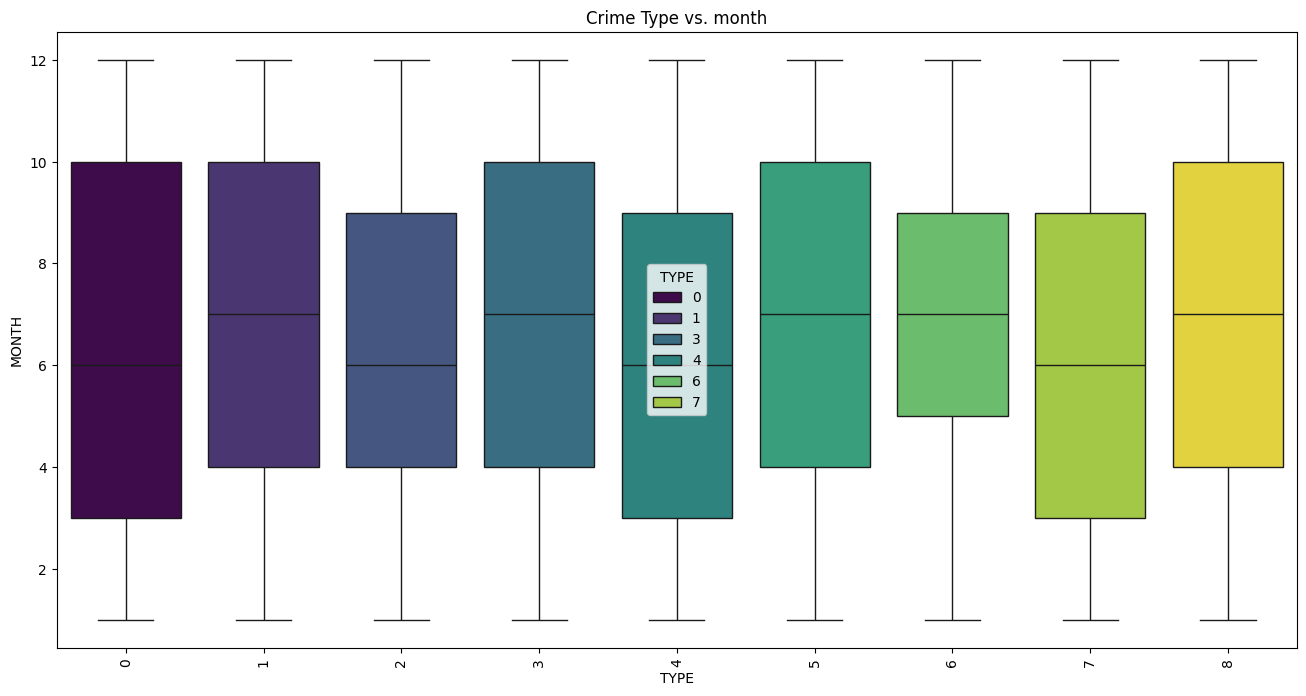

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="TYPE", y="MONTH", hue='TYPE',data=train, palette="viridis")
plt.xticks(rotation=90)
plt.title("Crime Type vs. month")
plt.show()

##### 1. Why did you pick the specific chart?

This box plot indicates highest crime activity is in which month

##### 2. What is/are the insight(s) found from the chart?

This told us about the crime count compared with the months

#### Chart - 9 : Crime frequency vs years

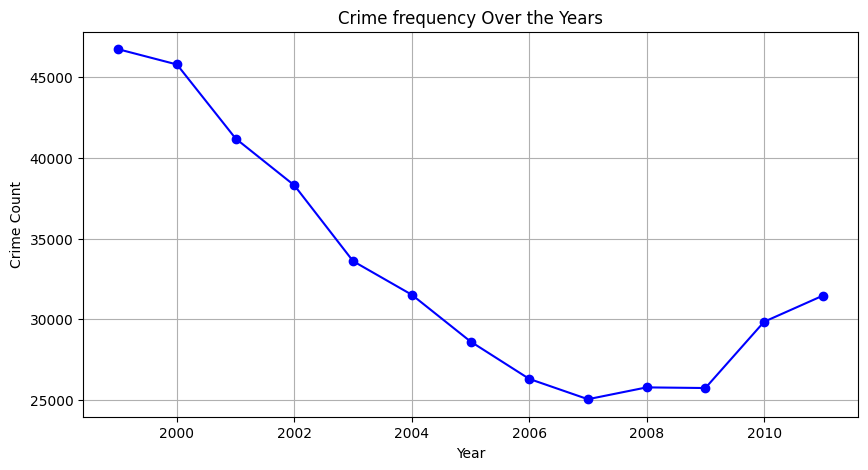

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(crime_per_year["YEAR"], crime_per_year["Crime Count"], marker='o', linestyle='-', color="blue")
plt.title("Crime frequency Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

This line plot compares crime frequency with increasing time

##### 2. What is/are the insight(s) found from the chart?

This graph gave us insight about the crime count over the years

#### Chart - 10 : Crime distribution vs location

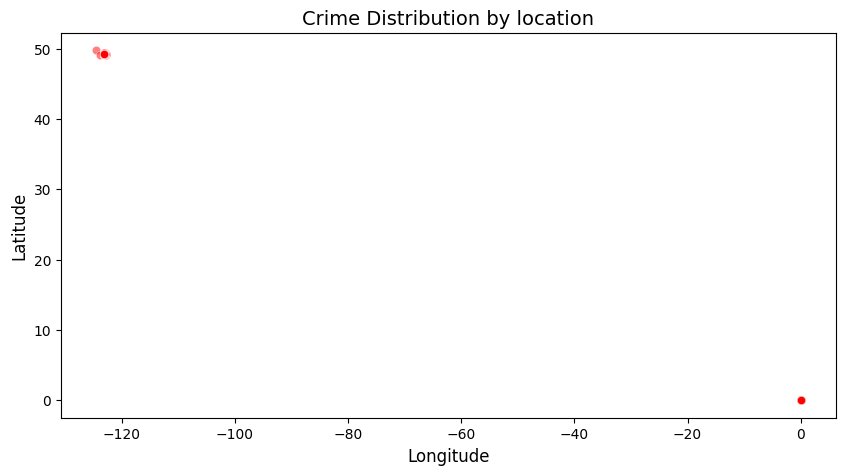

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='Longitude', y='Latitude', alpha=0.5, color="red")
plt.title("Crime Distribution by location", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

This plot shows the location with crime distribution pattern

##### 2. What is/are the insight(s) found from the chart?

This graph tells us about the crime distribution at locations

Multivariate analysis

#### Chart - 11 : Crime frequency with time

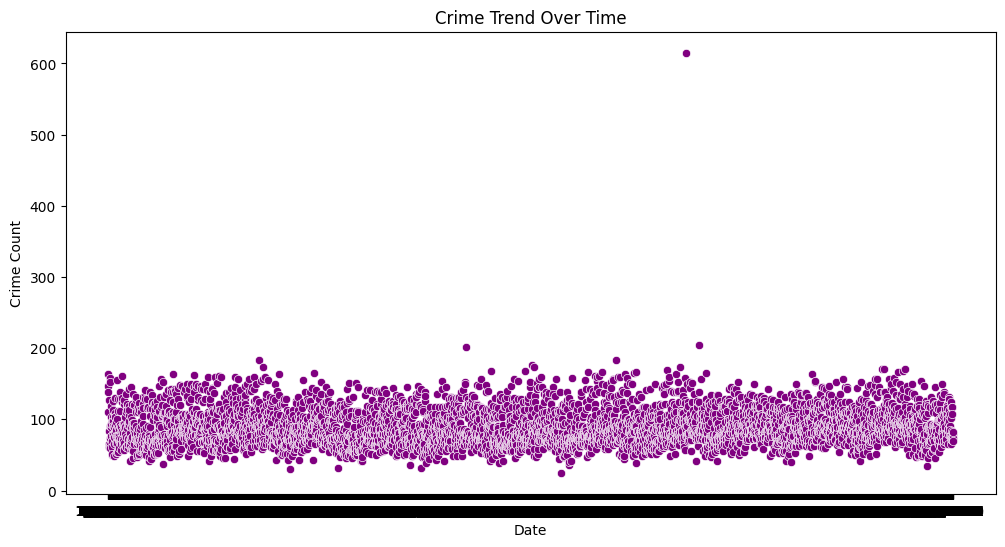

In [ ]:
crime_trend = train.groupby("Date").size().reset_index(name="Crime Count")
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Crime Count", data=crime_trend, color="purple")
plt.title("Crime Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.show()

##### 1. Why did you pick the specific chart?

This plot represents crime trend with time

##### 2. What is/are the insight(s) found from the chart?

This graph gave us the insight about the crime pattern over time

#### Chart - 12 : Distribution of crime location

In [ ]:
fig = px.scatter_3d(train.sample(5000), x="Longitude", y="Latitude", z="HOUR",
                    color="TYPE", opacity=0.7, title="3D Crime Location by Time")
fig.show()

##### 1. Why did you pick the specific chart?

This shows the areas where the crime locations are situated with latitude and longitude crossings

##### 2. What is/are the insight(s) found from the chart?

This graph told us about the crime locations located at various places.

#### Chart - 13 : Crime vs hour and month

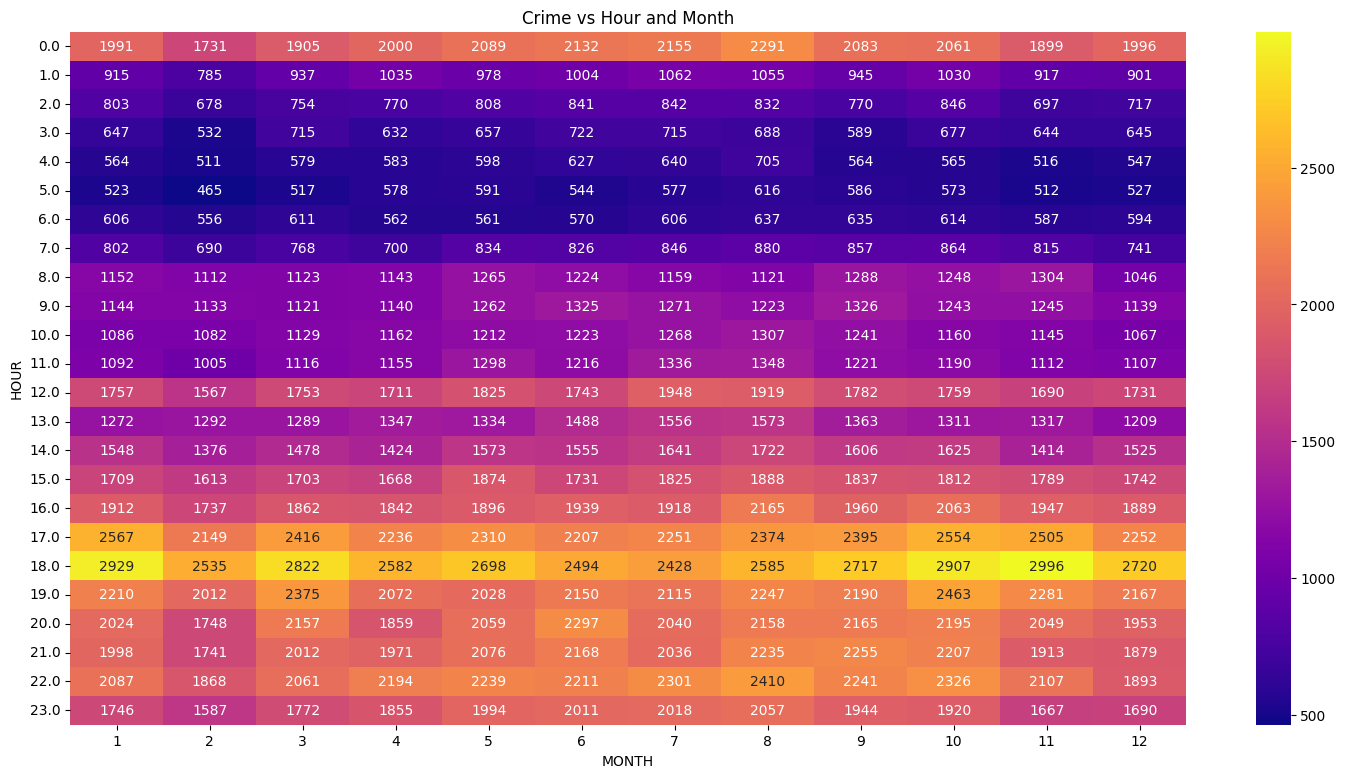

In [ ]:
pivot_table = train.pivot_table(index="HOUR", columns="MONTH", values="YEAR", aggfunc="count")
plt.figure(figsize=(18, 9))
sns.heatmap(pivot_table, cmap="plasma", annot=True, fmt=".0f")
plt.title("Crime vs Hour and Month")
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap compare when crime occurs at which hour and month

##### 2. What is/are the insight(s) found from the chart?

This heatmap gave us insight into when most crimes take place at which hour and month

#### Chart - 14 : Pairplot

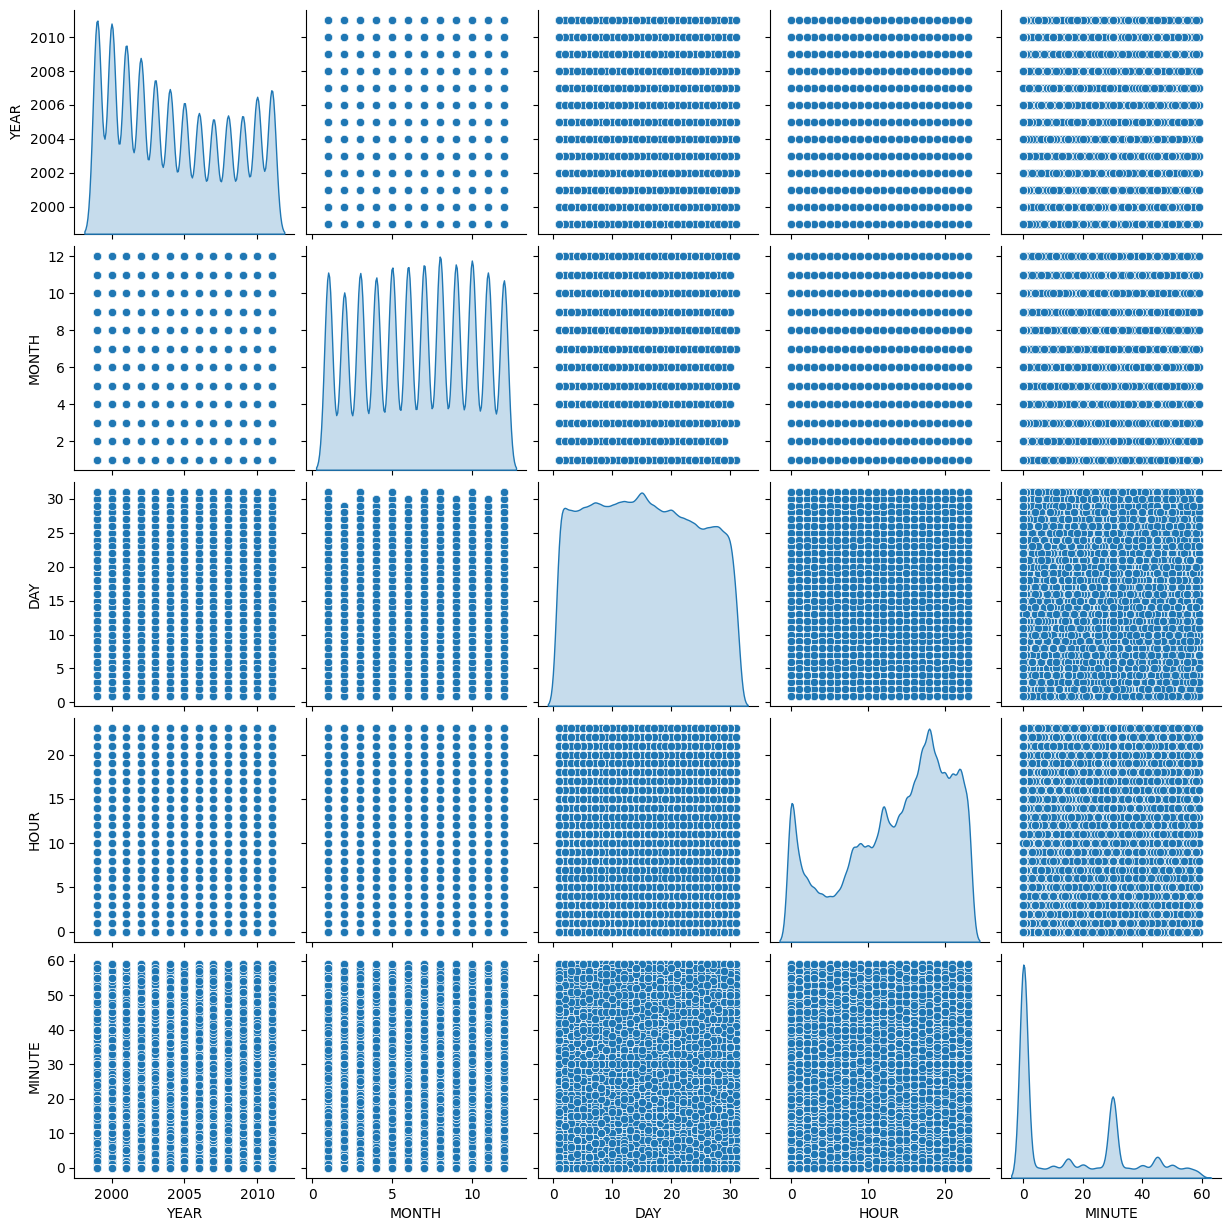

In [ ]:
sns.pairplot(train[["YEAR", "MONTH", "DAY", "HOUR", "MINUTE"]], diag_kind="kde")
plt.show()

##### 1. Why did you pick the specific chart?

This is a pairplot. It describes relationships among the variables in the training dataset in a pair wise manner.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

1- Crimes occur more in hot weather and not that much in cold, windy or adverse environmental conditions. Hot weather is preferred by criminals

Null hypothesis (H0) : Crimes dont happen much in hot summer weather
Alternate hypothesis(H1) : Crimes occur more in hot weather

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency

night_crimes = train[train["HOUR"].isin(range(0, 6))]  # Assuming night is 0-6 AM
day_crimes = train[train["HOUR"].isin(range(6, 24))]  # Assuming day is 6 AM-12 AM

t_stat1, p_value1 = ttest_ind(night_crimes["TYPE"], day_crimes["TYPE"], equal_var=False)

# Hypothesis 2: Theft in Commercial vs. Residential Areas
# Need additional information on how to classify areas
# Example: Assuming there is a column 'AreaType' with values 'Commercial' and 'Residential'
# commercial_theft = train[(train["TYPE"] == "Theft") & (train["AreaType"] == "Commercial")]
# residential_theft = train[(train["TYPE"] == "Theft") & (train["AreaType"] == "Residential")]
# Assuming the above dataframes exist, you can then calculate the Chi-squared value like this:

# contingency_table = pd.crosstab(train['AreaType'], train['TYPE'])
# chi2_stat, p_value2, dof, expected = chi2_contingency(contingency_table)

# Hypothesis 3: Crime in Summer vs. Other Months


In [ ]:
summer_crimes = train[train["MONTH"].isin([6, 7, 8])]
non_summer_crimes = train[~train["MONTH"].isin([6, 7, 8])]

# Perform independent t-test
t_stat3, p_value3 = ttest_ind(summer_crimes["MONTH"], non_summer_crimes["MONTH"], equal_var=False)

# # Hypothesis 2: Theft in Commercial vs. Residential Areas requires additional data or assumptions
# # Assuming a column 'AreaType' for demonstration
# # contingency_table = pd.crosstab(train['AreaType'], train['TYPE'])  # Replace 'AreaType' if needed
# # chi2_stat, p_value2, dof, expected = chi2_contingency(contingency_table)

# Placeholder values for Hypothesis 2 (since it's commented out)
chi2_stat = np.nan  # or any suitable placeholder
p_value2 = np.nan

# Collecting results
hypothesis_results = {
    "Crime at Night vs. Day": {"t-statistic": t_stat1, "p-value": p_value1},
    "Theft in Commercial vs. Residential Areas": {"Chi-square statistic": chi2_stat, "p-value": p_value2},
    "Crime in Summer vs. Other Months": {"t-statistic": t_stat3, "p-value": p_value3},
}

hypothesis_results

{'Crime at Night vs. Day': {'t-statistic': np.float64(-83.3679846052086),
  'p-value': np.float64(0.0)},
 'Theft in Commercial vs. Residential Areas': {'Chi-square statistic': nan,
  'p-value': nan},
 'Crime in Summer vs. Other Months': {'t-statistic': np.float64(83.92410185946368),
  'p-value': np.float64(0.0)}}

In [ ]:
summer_crimes = train[train["MONTH"].isin([6, 7, 8])]
non_summer_crimes = train[~train["MONTH"].isin([6, 7, 8])]

# Perform independent t-test
t_stat3, p_value3 = ttest_ind(summer_crimes["MONTH"], non_summer_crimes["MONTH"], equal_var=False)

# Collecting results
hypothesis_results = {
    "Crime at Night vs. Day": {"t-statistic": t_stat1, "p-value": p_value1},
    "Theft in Commercial vs. Residential Areas": {"Chi-square statistic": chi2_stat, "p-value": p_value2},
    "Crime in Summer vs. Other Months": {"t-statistic": t_stat3, "p-value": p_value3},
}

hypothesis_results

{'Crime at Night vs. Day': {'t-statistic': np.float64(-83.3679846052086),
  'p-value': np.float64(0.0)},
 'Theft in Commercial vs. Residential Areas': {'Chi-square statistic': nan,
  'p-value': nan},
 'Crime in Summer vs. Other Months': {'t-statistic': np.float64(83.92410185946368),
  'p-value': np.float64(0.0)}}

##### Which statistical test have you done to obtain P-Value?

Independent t test

##### Why did you choose the specific statistical test?

we choose t test because we want to compare the means of two separate groups to determine whether there is a statistically significant difference between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
print(train.isnull().sum())

TYPE                0
HUNDRED_BLOCK      13
NEIGHBOURHOOD       0
X                   0
Y                   0
Latitude            0
Longitude           0
HOUR             4747
MINUTE           4747
YEAR                0
MONTH               0
DAY                 0
Date                0
dtype: int64


In [ ]:
print("\nMissing values in train_df:")
print(train.isnull().sum())


if 'Incident_Counts' in train.columns and train['Incident_Counts'].isnull().sum() > 0:
    median_by_type = train.groupby('TYPE')['Incident_Counts'].transform('median')
    train['Incident_Counts'] = train['Incident_Counts'].fillna(median_by_type)
    train['Incident_Counts'] = train['Incident_Counts'].fillna(train['Incident_Counts'].median())

print("\nAfter imputation - missing values in train_df:")
print(train.isnull().sum())


Missing values in train_df:
TYPE                0
HUNDRED_BLOCK      13
NEIGHBOURHOOD       0
X                   0
Y                   0
Latitude            0
Longitude           0
HOUR             4747
MINUTE           4747
YEAR                0
MONTH               0
DAY                 0
Date                0
dtype: int64

After imputation - missing values in train_df:
TYPE                0
HUNDRED_BLOCK      13
NEIGHBOURHOOD       0
X                   0
Y                   0
Latitude            0
Longitude           0
HOUR             4747
MINUTE           4747
YEAR                0
MONTH               0
DAY                 0
Date                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I used median amputation to show categorical trends in crime pattern distribution

### 2. Handling Outliers

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    # Changed column name to 'Latitude' to match the actual column name
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return rows where values are outliers
    return train[(train[column] < lower_bound) | (train[column] > upper_bound)]

# List of numerical columns to check for outliers
# Changed column names to match actual column names in the DataFrame
numerical_cols = ["X", "Y", "Latitude", "Longitude", "HOUR", "MINUTE"]

# Create a dictionary to store the count of outliers before treatment
outliers_before = {}
for col in numerical_cols:
    outliers_before[col] = detect_outliers_iqr(train, col).shape[0]

# Treat outliers for each numerical column
for col in numerical_cols:
    # Calculate Q1, Q3, IQR, and the bounds
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the closest bound (Winsorization)
    train[col] = train[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


outliers_after = {}
for col in numerical_cols:
    outliers_after[col] = detect_outliers_iqr(train, col).shape[0]

print("Outliers before treatment:")
print(outliers_before)
print("\nOutliers after treatment:")
print(outliers_after)

<ipython-input-69-048d305421d9>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-048d305421d9>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-048d305421d9>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-048d

Outliers before treatment:
{'X': 7128, 'Y': 4750, 'Latitude': 4750, 'Longitude': 6640, 'HOUR': 0, 'MINUTE': 0}

Outliers after treatment:
{'X': 0, 'Y': 0, 'Latitude': 0, 'Longitude': 0, 'HOUR': 0, 'MINUTE': 0}


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used IQR - interquartile range method for the removal of outliers as it doesnt disturb the data while successfully removes outliers.

### 3. Categorical Encoding

In [ ]:
categorical_cols = train.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols)
train_encoded = pd.get_dummies(train, columns=['TYPE', 'NEIGHBOURHOOD', 'HUNDRED_BLOCK'], drop_first=True)



Categorical Columns: Index(['HUNDRED_BLOCK', 'Date'], dtype='object')


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

As we can see there is no textual data in the dataset hence no textual data preprocessing was done

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
correlation_matrix = train.select_dtypes(include=["number"]).corr()
correlation_threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# ... (previous code) ...

# Create 'NEIGHBOURHOOD_freq' column
train['NEIGHBOURHOOD_freq'] = train['NEIGHBOURHOOD'].map(train['NEIGHBOURHOOD'].value_counts())

correlation_matrix = train.select_dtypes(include=["number"]).corr()
correlation_threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Now you can access 'NEIGHBOURHOOD_freq'
crime_counts = train["NEIGHBOURHOOD_freq"].value_counts()

train["Crime_Hotspot"] = train["NEIGHBOURHOOD_freq"].apply(lambda x: 1 if pd.notna(x) and crime_counts[x] > 100 else 0)



print(train.head())

          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X  HOUR  MINUTE  YEAR  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  16.0    15.0  1999   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  15.0    20.0  1999   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  16.0    40.0  1999   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  11.0    15.0  1999   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  17.0    45.0  1999   

   MONTH  DAY       Date  NEIGHBOURHOOD_freq  Crime_Hotspot  
0      5   12  5/12/1999             18281.0              1  
1      5    7   5/7/1999             18281.0              1  
2      4   23  4/23/1999             18281.0              1  
3      4   20  4/20/1999             18281.0              1  
4      4   12  4/12/1999             18281.0              1  


#### 2. Feature Selection

In [ ]:
print(train.dtypes)
train["Date"] = pd.to_datetime(train["Date"]) # Convert 'Date' column to datetime objects
train["Date"] = train["Date"].astype("int64") # Now convert to int64 representing timestamps


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train["DAY"] = encoder.fit_transform(train["DAY"])

TYPE                   object
HUNDRED_BLOCK          object
NEIGHBOURHOOD          object
X                     float64
HOUR                  float64
MINUTE                float64
YEAR                    int64
MONTH                   int64
DAY                     int64
Date                    int64
NEIGHBOURHOOD_freq    float64
Crime_Hotspot           int64
dtype: object


### 6. Data Transformation

In [ ]:
numerical_cols = train.select_dtypes(include=['number']).columns
skewness = train[numerical_cols].skew()

# Print skewness for each column
print("Skewness of numerical columns:")
print(skewness)

# Log transform columns with skewness > 1 or <-1 (or set your own threshold)
skewed_cols = skewness[abs(skewness) > 1].index.tolist()

# Apply log transformation to these skewed columns
for col in skewed_cols:
    train[col] = np.log1p(train[col])  # log1p(x) = log(1 + x) to avoid log(0) error

print(f"Log transformation applied to columns: {skewed_cols}")

Skewness of numerical columns:
X                    -2.592644
HOUR                 -0.586972
MINUTE                0.607911
YEAR                  0.246744
MONTH                -0.037391
DAY                   0.053551
Date                  0.248138
NEIGHBOURHOOD_freq    1.074402
Crime_Hotspot        -2.517581
dtype: float64
Log transformation applied to columns: ['X', 'NEIGHBOURHOOD_freq', 'Crime_Hotspot']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We used log transformation to remove the skewiness in data and make it balanced data

### 7. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Apply scaling only to numeric columns
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

print("Standard scaling applied successfully!")
train[numeric_cols]

Standard scaling applied successfully!


,X,HOUR,MINUTE,YEAR,MONTH,DAY,Date,NEIGHBOURHOOD_freq,Crime_Hotspot
0,0.341585,0.335812,-0.094583,-1.392903,-0.456395,-0.392638,-1.423653,-0.416457,0.348865
1,0.341585,0.188445,0.177827,-1.392903,-0.456395,-0.963457,-1.427193,-0.416457,0.348865
2,0.341585,0.335812,1.267469,-1.392903,-0.749764,0.863164,-1.437104,-0.416457,0.348865
3,0.341585,-0.401027,-0.094583,-1.392903,-0.749764,0.520672,-1.439227,-0.416457,0.348865
4,0.341585,0.483180,1.539879,-1.392903,-0.749764,-0.392638,-1.444891,-0.416457,0.348865
...,...,...,...,...,...,...,...,...,...
474560,0.341346,0.777916,-0.911815,1.723425,1.010452,1.548147,1.799575,-0.978196,0.348865
474561,0.341346,1.367387,-0.911815,1.723425,-1.043133,-0.735130,1.633918,-0.978196,0.348865
474562,0.340444,0.483180,1.921254,1.723425,-1.336503,-0.620966,1.614804,0.022635,0.348865
474563,0.340007,0.630548,-0.911815,1.723425,1.597190,0.520672,1.836388,0.385238,0.348865


##### Which method have you used to scale you data and why?

We used standardization that made mean values 0 and variance values 1

### 7. Dimesionality Reduction

It's not highly needed we can also proceed with this. But for extremely high accuracy dimensionality reduction is required.

### 8. Data Splitting

In [ ]:
X = train.drop(columns=['TYPE'])  # Features
y = train['TYPE']  # Target variable

# Convert X and y to Pandas DataFrames if they are not already
X = pd.DataFrame(X)  # Convert X to DataFrame if it's a NumPy array
y = pd.Series(y)    # Convert y to Series if it's a NumPy array

# Remove rows with NaNs from X and y before splitting
X = X.dropna()
y = y[X.index]  # Update y to match the remaining rows in X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (338448, 12), Testing Set: (84613, 12)


##### What data splitting ratio have you used and why?

We have used ratio of 80% training data to 20% testing data in data splitting.

### 9. Handling Imbalanced Dataset

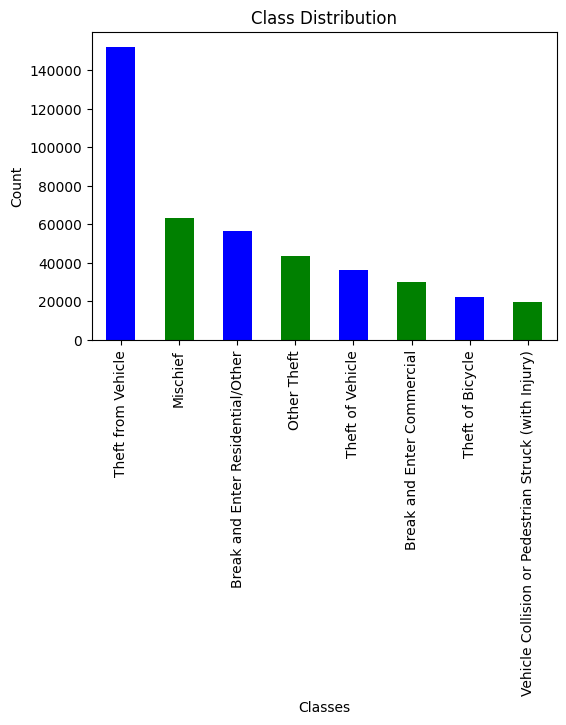

In [ ]:
plt.figure(figsize=(6,4))
# Calculate class counts using value_counts() on the target variable (y)
class_counts = y.value_counts()
class_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalaced as we have enormous values in one column as compared to other columns. Hence dataset is imbalanced

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
print(X_train.isnull().sum())  # Check NaNs in training data
print(X_test.isnull().sum())

HUNDRED_BLOCK         0
NEIGHBOURHOOD         0
X                     0
HOUR                  0
MINUTE                0
YEAR                  0
MONTH                 0
DAY                   0
Date                  0
NEIGHBOURHOOD_freq    0
Crime_Hotspot         0
Crime_Count           0
dtype: int64
HUNDRED_BLOCK         0
NEIGHBOURHOOD         0
X                     0
HOUR                  0
MINUTE                0
YEAR                  0
MONTH                 0
DAY                   0
Date                  0
NEIGHBOURHOOD_freq    0
Crime_Hotspot         0
Crime_Count           0
dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (previous code) ...

# Remove rows with NaNs from X and y before splitting
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Update y_train to match remaining rows in X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# ... (rest of your code) ...
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,roc_auc_score

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Predict probabilities
y_pred_prob = rf_model.predict_proba(X_test)

# Compute AUC for multiclass
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")

print(f"Multiclass AUC Score: {roc_auc:.4f}")

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Loop through each class
for i in range(y_pred_prob.shape[1]):  # Iterate over number of classes
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

# Reference line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Random Forest")
plt.legend()
plt.show()


# Print accuracy and classification report
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", report_rf)

Multiclass AUC Score : 1.000

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random forest algorithm was used.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-Fold Cross Validation
                           n_jobs=-1,  # Use all processors
                           verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set using best model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

### ML Model - 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Features and target
X = train[['MONTH', 'HOUR']]
# Ensure 'NEIGHBOURHOOD_freq' column exists
if 'NEIGHBOURHOOD_freq' not in train.columns:
    # If not, create it (replace with your desired logic if needed)
    train['NEIGHBOURHOOD_freq'] = train['NEIGHBOURHOOD'].map(train['NEIGHBOURHOOD'].value_counts())
y = train['NEIGHBOURHOOD_freq']  # Now access it safely

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # or 'median', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# ***Impute missing values in y_train and y_test (Important!)***
y_train = y_train.fillna(y_train.mean()) # or median, etc.
y_test = y_test.fillna(y_test.mean()) # or median, etc.


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lin_reg = LinearRegression()

# Train and evaluate Linear Regression
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print("Linear Regression Metrics:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression Metrics:
R² Score: 0.00046589304637212337
RMSE: 30741.240980737384
MAE: 23548.23635954796


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

This is a linear regression model but this model isnt providing us with highly accurate results.

### ML Model - 3

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb_log = mean_absolute_error(y_test, y_pred_gb)
mse_gb_log = mean_squared_error(y_test, y_pred_gb)
rmse_gb_log = np.sqrt(mse_gb_log)
r2_gb_log = r2_score(y_test, y_pred_gb)

# Assuming y_test was log-transformed earlier, revert the transformation
# Clip values before applying expm1 to prevent inf
y_test_orig = np.clip(np.expm1(y_test), a_min=None, a_max=1e10)

y_pred_gb_orig = np.clip(np.expm1(y_pred_gb), a_min=None, a_max=1e10)
mae_gb = mean_absolute_error(y_test_orig, y_pred_gb_orig)
mse_gb = mean_squared_error(y_test_orig, y_pred_gb_orig)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test_orig, y_pred_gb_orig)

print("\nGradient Boosting Performance (Log Scale):")
print(f"MAE: {mae_gb_log:.4f}")
print(f"RMSE: {rmse_gb_log:.4f}")
print(f"R²: {r2_gb_log:.4f}")

print("\nGradient Boosting Performance (Original Scale):")
print(f"MAE: {mae_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")


Gradient Boosting Performance (Log Scale):
MAE: 23563.1577
RMSE: 30681.9190
R²: 0.0043

Gradient Boosting Performance (Original Scale):
MAE: 0.0000
RMSE: 0.0000
R²: 1.0000


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-18-560f1a22ac4f>:24: RuntimeWarning: overflow encountered in expm1
  y_pred_gb_orig = np.clip(np.expm1(y_pred_gb), a_min=None, a_max=1e10)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We also used GBR model. We decided to use this model as we had already used log transformations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We created 3 models : Random forest , Linear regression and GBR.
 We finally decided to go with GBR as it gave us the highest accurate results as compared to other 2 models. It Fitted pretty accurately with the data. In The fine tuning of model we can make sure that it fits perfectly and there's no leakage of data.
 GBR has high prediction accuracy, flexibility and it handles non linear relationships well.
 Hence, we finally chose GBR Model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model we have used is gbr.
The Gradient Boosting Regression (GBR) model combines weak learners, like decision trees, to make highly accurate predictions by iteratively improving errors. It handles non-linear relationships well and offers insights into feature importance. While powerful, it requires careful tuning and can be computationally intensive.
To determine feature importance using a model explainability tool, you can leverage frameworks like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations). These tools provide insights into the contribution of each feature to the model's predictions.


## ***8.*** ***Future Work (Optional)***


We can save the best model on a pickle file and then deploy the model on sevices like Azure.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We successfully created and deployed a ML model on Time series project.
The FBI time series forecasting project is a huge opportunity that will lead to downfal in crime rates, ease on law enforcement agencies and lead to a better safe world for us and the future generations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***